In [1]:

#运行包
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold


In [2]:
#检测tensorflow和TensorFlow Decision Forests的版本
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)
#哇～跟大佬的版本一样诶

TensorFlow v2.12.0
TensorFlow Decision Forests v1.3.0


In [7]:
#加载数据
dataset_df=pd.read_csv('./train.csv')
print("Full train dataset shape is {}".format(dataset_df.shape))

#绝对路径和相对路径问题

Full train dataset shape is (617, 58)


In [8]:
#展示数据
dataset_df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [9]:
#描述性分析-数值型
dataset_df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


<Axes: ylabel='count'>

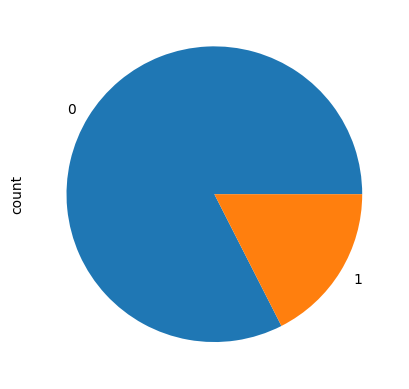

In [11]:
#分类，饼图展示
plot_df = dataset_df.Class.value_counts()
plot_df.plot(kind="pie")

In [12]:
#数据分布
# Store all the numerical column names into a list
NUM_FEATURE_COLUMNS = [i for i in dataset_df.columns if i not in ["Id", "EJ", "Class"]]



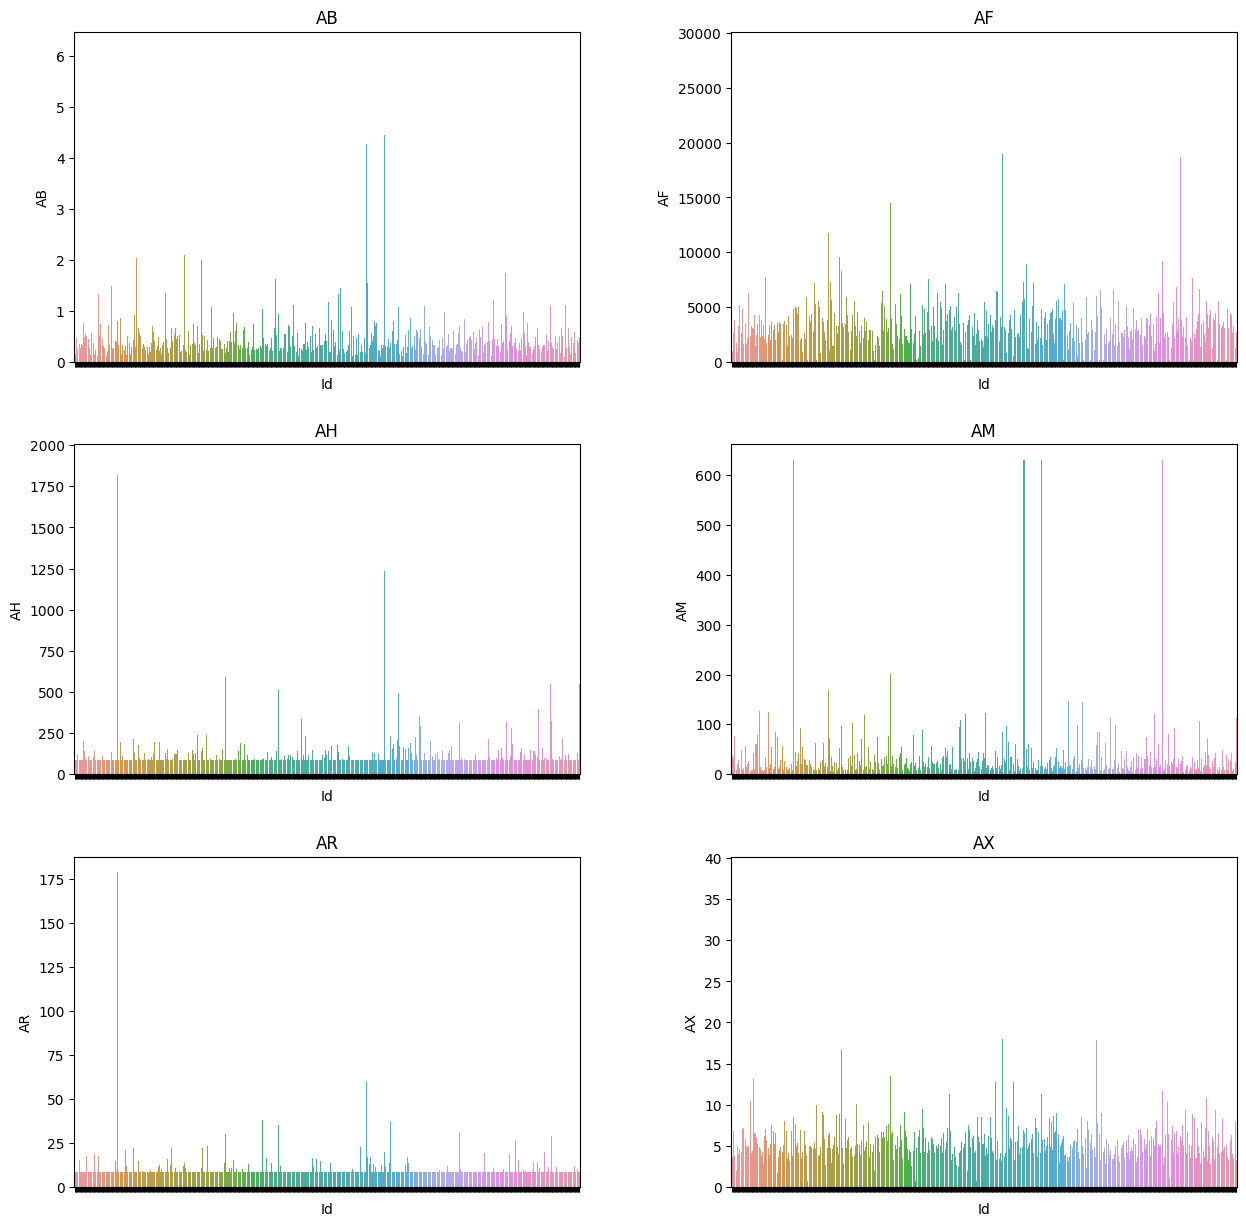

In [13]:
#画图
figure, axis = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.25, wspace=0.3)

for i, column_name in enumerate(NUM_FEATURE_COLUMNS[:6]):
    row = i//2
    col = i % 2
    bp = sns.barplot(ax=axis[row, col], x=dataset_df['Id'], y=dataset_df[column_name])
    bp.set(xticklabels=[])
    #bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 7)
    axis[row, col].set_title(column_name)
plt.show()


In [14]:
FEATURE_COLUMNS = [i for i in dataset_df.columns if i not in ["Id"]]

In [15]:
#split the dataset into training and testing datasets
#KFold validation
# Creates a GroupKFold with 5 splits
kf = KFold(n_splits=5)

In [16]:
# Create list of ids for the creation of oof dataframe.
ID_LIST = dataset_df.index

# Create a dataframe of required size with zero values.
oof = pd.DataFrame(data=np.zeros((len(ID_LIST),1)), index=ID_LIST)

# Create an empty dictionary to store the models trained for each fold.
models = {}

# Create empty dict to save metircs for the models trained for each fold.
accuracy = {}
cross_entropy = {}

# Save the name of the label column to a variable.
label = "Class"

In [17]:
#选择模型
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [19]:
#选择tensorflow_decision_forests.keras.RandomForestModel模型
rf = tfdf.keras.RandomForestModel(max_depth=5, num_trees=500)

Use /var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/tmp3lho9clj as temporary training directory


In [20]:
#Strategies to handle the dataset imbalance
# Calculate the number of negative and positive values in `Class` column
neg, pos = np.bincount(dataset_df['Class'])
# Calculate total samples
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 617
    Positive: 108 (17.50% of total)



In [21]:
#Undersampling
# This function generates undersampled dataset.
def random_under_sampler(df):
    # Calculate the number of samples for each label. 
    neg, pos = np.bincount(df['Class'])

    # Choose the samples with class label `1`.
    one_df = df.loc[df['Class'] == 1] 
    # Choose the samples with class label `0`.
    zero_df = df.loc[df['Class'] == 0]
    # Select `pos` number of negative samples.
    # This makes sure that we have equal number of samples for each label.
    zero_df = zero_df.sample(n=pos)

    # Join both label dataframes.
    undersampled_df = pd.concat([zero_df, one_df])

    # Shuffle the data and return
    return undersampled_df.sample(frac = 1)

In [22]:
#Class weighting
# Calculate the number of samples for each label.
neg, pos = np.bincount(dataset_df['Class'])

# Calculate total samples.
total = neg + pos

# Calculate the weight for each label.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.61
Weight for class 1: 2.86


In [23]:
model.fit(x=train_ds, class_weight=class_weight)

NameError: name 'model' is not defined

In [25]:
#Train Random Forest Model
# Loop through each fold
for i, (train_index, valid_index) in enumerate(kf.split(X=dataset_df)):
        print('##### Fold',i+1)

        # Fetch values corresponding to the index 
        train_df = dataset_df.iloc[train_index]
        valid_df = dataset_df.iloc[valid_index]
        valid_ids = valid_df.index.values
        
        # Select only feature columns for training.
        train_df = train_df[FEATURE_COLUMNS]
        valid_df = valid_df[FEATURE_COLUMNS]
        
        # There's one more step required before we can train the model. 
        # We need to convert the datatset from Pandas format (pd.DataFrame)
        # into TensorFlow Datasets format (tf.data.Dataset).
        # TensorFlow Datasets is a high performance data loading library 
        # which is helpful when training neural networks with accelerators like GPUs and TPUs.
        # Note: Some column names contains white spaces at the end of their name, 
        # which is non-comaptible with SavedModels save format. 
        # By default, `pd_dataframe_to_tf_dataset` function will convert 
        # this column names into a compatible format. 
        # So you can safely ignore the warnings related to this.
        train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label=label)
        valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_df, label=label)

        # Define the model and metrics
        rf = tfdf.keras.RandomForestModel()
        rf.compile(metrics=["accuracy", "binary_crossentropy"]) 
        
        # Train the model
        # We will train the model using a one-liner.
        # Note: you may see a warning about Autograph. 
        # You can safely ignore this, it will be fixed in the next release.
        # Previously calculated class weights is used to handle imbalance.
        rf.fit(x=train_ds, class_weight=class_weight)
        
        # Store the model
        models[f"fold_{i+1}"] = rf
        
        
        # Predict OOF value for validation data
        predict = rf.predict(x=valid_ds)
        
        # Store the predictions in oof dataframe
        oof.loc[valid_ids, 0] = predict.flatten() 
        
        # Evaluate and store the metrics in respective dicts
        evaluation = rf.evaluate(x=valid_ds,return_dict=True)
        accuracy[f"fold_{i+1}"] = evaluation["accuracy"]
        cross_entropy[f"fold_{i+1}"]= evaluation["binary_crossentropy"]

##### Fold 1


Use /var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/tmpiaqd3c0l as temporary training directory
Reading training dataset...


2023-07-05 16:48:37.253380: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Training dataset read in 0:00:01.732280. Found 493 examples.
Training model...
Model trained in 0:00:00.060061
Compiling model...


[INFO 23-07-05 16:48:38.9897 CST kernel.cc:1242] Loading model from path /var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/tmpiaqd3c0l/model/ with prefix f935ae14923e488c
[INFO 23-07-05 16:48:39.0054 CST decision_forest.cc:660] Model loaded with 300 root(s), 14200 node(s), and 56 input feature(s).
[INFO 23-07-05 16:48:39.0054 CST abstract_model.cc:1312] Engine "RandomForestOptPred" built
[INFO 23-07-05 16:48:39.0054 CST kernel.cc:1074] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.
1/1 [==============================] - 1s 544ms/step - loss: 0.0000e+00 - accuracy: 0.9516 - binary_crossentropy: 0.2126
##### Fold 2


Use /var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/tmp2bd15ir4 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.228321. Found 493 examples.
Training model...
Model trained in 0:00:00.054416
Compiling model...
Model compiled.
1/1 [==============================] - 0s 43ms/step


[INFO 23-07-05 16:48:40.8863 CST kernel.cc:1242] Loading model from path /var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/tmp2bd15ir4/model/ with prefix 324e3775816d4114
[INFO 23-07-05 16:48:40.9007 CST decision_forest.cc:660] Model loaded with 300 root(s), 13664 node(s), and 56 input feature(s).
[INFO 23-07-05 16:48:40.9008 CST kernel.cc:1074] Use fast generic engine


1/1 [==============================] - 0s 132ms/step - loss: 0.0000e+00 - accuracy: 0.8710 - binary_crossentropy: 0.2649
##### Fold 3


Use /var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/tmphg7gfkw7 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.230004. Found 494 examples.
Training model...
Model trained in 0:00:00.051090
Compiling model...


[INFO 23-07-05 16:48:41.5850 CST kernel.cc:1242] Loading model from path /var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/tmphg7gfkw7/model/ with prefix fd7d7efce95f4011
[INFO 23-07-05 16:48:41.5988 CST decision_forest.cc:660] Model loaded with 300 root(s), 13154 node(s), and 56 input feature(s).
[INFO 23-07-05 16:48:41.5989 CST kernel.cc:1074] Use fast generic engine


Model compiled.


1/1 [==============================] - 0s 125ms/step - loss: 0.0000e+00 - accuracy: 0.9024 - binary_crossentropy: 0.2750
##### Fold 4


Use /var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/tmpvo21g62_ as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.229334. Found 494 examples.
Training model...
Model trained in 0:00:00.055331
Compiling model...
Model compiled.
1/1 [==============================] - 0s 43ms/step


[INFO 23-07-05 16:48:42.2712 CST kernel.cc:1242] Loading model from path /var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/tmpvo21g62_/model/ with prefix a7975103f445407a
[INFO 23-07-05 16:48:42.2856 CST decision_forest.cc:660] Model loaded with 300 root(s), 13456 node(s), and 56 input feature(s).
[INFO 23-07-05 16:48:42.2856 CST kernel.cc:1074] Use fast generic engine


1/1 [==============================] - 0s 130ms/step - loss: 0.0000e+00 - accuracy: 0.9268 - binary_crossentropy: 0.2695
##### Fold 5


Use /var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/tmpiokrri8d as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.228398. Found 494 examples.
Training model...
Model trained in 0:00:00.054371
Compiling model...
Model compiled.


[INFO 23-07-05 16:48:42.9610 CST kernel.cc:1242] Loading model from path /var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/tmpiokrri8d/model/ with prefix 349f89659335429a
[INFO 23-07-05 16:48:42.9756 CST decision_forest.cc:660] Model loaded with 300 root(s), 13824 node(s), and 56 input feature(s).
[INFO 23-07-05 16:48:42.9756 CST kernel.cc:1074] Use fast generic engine


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 129ms/step - loss: 0.0000e+00 - accuracy: 0.9593 - binary_crossentropy: 0.2236


In [26]:
#Visualize the model
tfdf.model_plotter.plot_model_in_colab(models['fold_1'], tree_idx=0, max_depth=3)

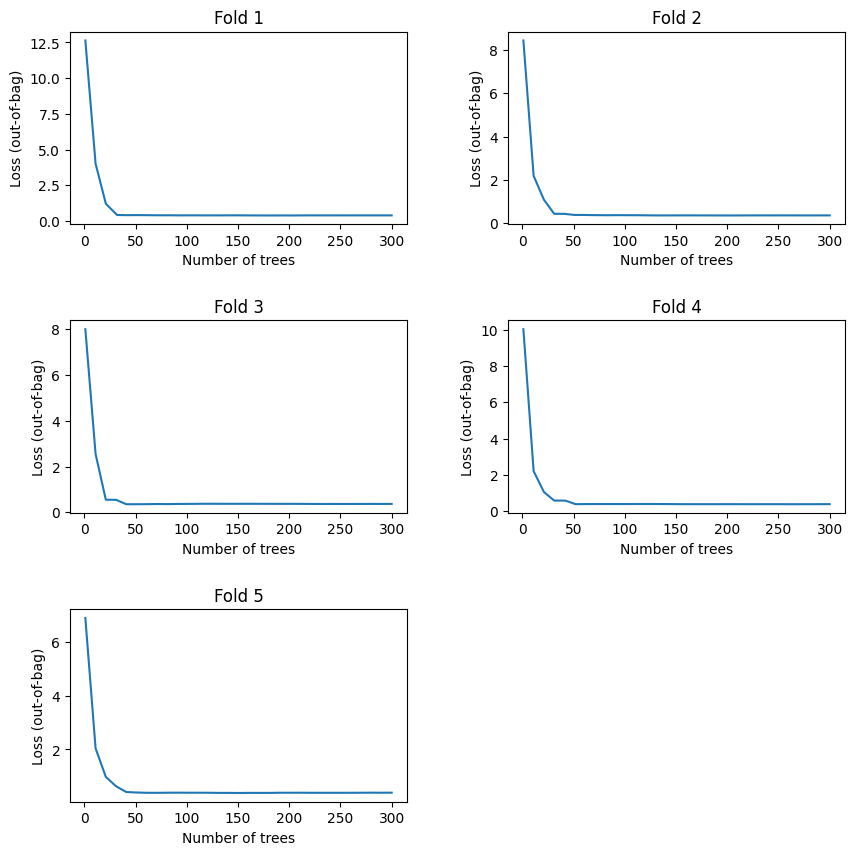

In [27]:
#Evaluate the model on the Out of bag (OOB) data and the validation dataset

figure, axis = plt.subplots(3, 2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, fold_no in enumerate(models.keys()):
    row = i//2
    col = i % 2
    logs = models[fold_no].make_inspector().training_logs()
    axis[row, col].plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
    axis[row, col].set_title(f"Fold {i+1}")
    axis[row, col].set_xlabel('Number of trees')
    axis[row, col].set_ylabel('Loss (out-of-bag)')

axis[2][1].set_visible(False)
plt.show()


In [28]:
#We can also see some general stats on the OOB dataset:

for _model in models:
    inspector = models[_model].make_inspector()
    print(_model, inspector.evaluation())

fold_1 Evaluation(num_examples=493, accuracy=0.8534402284733222, loss=0.39291218697800306, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)
fold_2 Evaluation(num_examples=493, accuracy=0.8768889770463925, loss=0.36633089206592395, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)
fold_3 Evaluation(num_examples=494, accuracy=0.8718674619650029, loss=0.3710041570419043, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)
fold_4 Evaluation(num_examples=494, accuracy=0.8779235319464512, loss=0.3845405184444041, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)
fold_5 Evaluation(num_examples=494, accuracy=0.8498396382459034, loss=0.39582235919337483, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)


In [29]:
#Now, let us check the evaluation metrics for each fold and its average value.

average_loss = 0
average_acc = 0

for _model in  models:
    average_loss += cross_entropy[_model]
    average_acc += accuracy[_model]
    print(f"{_model}: acc: {accuracy[_model]:.4f} loss: {cross_entropy[_model]:.4f}")

print(f"\nAverage accuracy: {average_acc/5:.4f}  Average loss: {average_loss/5:.4f}")

fold_1: acc: 0.9516 loss: 0.2126
fold_2: acc: 0.8710 loss: 0.2649
fold_3: acc: 0.9024 loss: 0.2750
fold_4: acc: 0.9268 loss: 0.2695
fold_5: acc: 0.9593 loss: 0.2236

Average accuracy: 0.9222  Average loss: 0.2491


In [30]:
#Variable importances
inspector = models['fold_1'].make_inspector()

print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES


In [31]:
# Each line is: (feature name, (index of the feature), importance score)
inspector.variable_importances()["NUM_AS_ROOT"]

[("DU" (1; #32), 42.0),
 ("FL" (1; #47), 36.0),
 ("CR" (1; #21), 27.0),
 ("DA" (1; #25), 25.0),
 ("AB" (1; #0), 22.0),
 ("GL" (1; #55), 22.0),
 ("FD_" (1; #44), 16.0),
 ("DI" (1; #29), 15.0),
 ("AF" (1; #1), 14.0),
 ("CD_" (1; #17), 10.0),
 ("BQ" (1; #12), 9.0),
 ("BC" (1; #8), 8.0),
 ("DE" (1; #26), 8.0),
 ("EH" (1; #38), 8.0),
 ("EB" (1; #35), 6.0),
 ("EE" (1; #36), 6.0),
 ("DF" (1; #27), 5.0),
 ("AR" (1; #4), 3.0),
 ("BN" (1; #10), 3.0),
 ("EU" (1; #42), 3.0),
 ("FI" (1; #46), 3.0),
 ("BZ" (1; #14), 1.0),
 ("CC" (1; #16), 1.0),
 ("CF" (1; #18), 1.0),
 ("DH" (1; #28), 1.0),
 ("DL" (1; #30), 1.0),
 ("DN" (1; #31), 1.0),
 ("FE" (1; #45), 1.0),
 ("FR" (1; #48), 1.0),
 ("GF" (1; #52), 1.0)]

In [33]:
#Submission
test_df = pd.read_csv('./test.csv')
test_ds_pd = test_df
test_df_columns = test_ds_pd.columns.tolist()
TEST_FEATURE_COLUMNS = [i for i in FEATURE_COLUMNS \
                        if i in test_df_columns and i != "Class"]
test_ds_pd = test_ds_pd[TEST_FEATURE_COLUMNS]
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd)
predictions = models['fold_1'].predict(test_ds)
n_predictions= [[round(abs(i-1), 8), i] for i in predictions.ravel()]
print(n_predictions)


1/1 [==============================] - 0s 44ms/step
[[0.61333361, 0.3866664], [0.61333361, 0.3866664], [0.61333361, 0.3866664], [0.61333361, 0.3866664], [0.61333361, 0.3866664]]


In [34]:
sample_submission = pd.read_csv("./sample_submission.csv")
sample_submission[['class_0', 'class_1']] = n_predictions
sample_submission.to_csv('./submission.csv', index=False)